# Image classification on MNIST sign language dataset

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from keras.models import Sequential
from keras import layers
from keras import regularizers
from keras.utils import to_categorical

Using TensorFlow backend.


## Get the data

In [4]:
PATH = 'data/'

In [5]:
!ls {PATH}

american_sign_language.PNG  amer_sign3.png	 sign_mnist_train.csv
amer_sign2.png		    sign_mnist_test.csv


In [6]:
train_data = np.genfromtxt(f'{PATH}sign_mnist_train.csv',
                           delimiter=',', skip_header=1,
                           dtype='float32')

test_data = np.genfromtxt(f'{PATH}sign_mnist_test.csv',
                           delimiter=',', skip_header=1,
                           dtype='float32')

In [7]:
train_data[0]

array([  3., 107., 118., 127., 134., 139., 143., 146., 150., 153., 156.,
       158., 160., 163., 165., 159., 166., 168., 170., 170., 171., 171.,
       171., 172., 171., 171., 170., 170., 169., 111., 121., 129., 135.,
       141., 144., 148., 151., 154., 157., 160., 163., 164., 170., 119.,
       152., 171., 171., 170., 171., 172., 172., 172., 172., 172., 171.,
       171., 170., 113., 123., 131., 137., 142., 145., 150., 152., 155.,
       158., 161., 163., 164., 172., 105., 142., 170., 171., 171., 171.,
       172., 172., 173., 173., 172., 171., 171., 171., 116., 125., 133.,
       139., 143., 146., 151., 153., 156., 159., 162., 163., 167., 167.,
        95., 144., 171., 172., 172., 172., 172., 172., 173., 173., 173.,
       172., 172., 171., 117., 126., 134., 140., 145., 149., 153., 156.,
       158., 161., 163., 164., 175., 156.,  87., 154., 172., 173., 173.,
       173., 173., 173., 174., 174., 174., 173., 172., 172., 119., 128.,
       136., 142., 146., 150., 153., 156., 159., 16

### separate labels from the data

In [8]:
# randomly shuffle the data
np.random.shuffle(train_data)

In [8]:
X_train = train_data[:, 1:].copy()
y_train = train_data[:, 0].copy()

X_test = test_data[:, 1:].copy()
y_test = test_data[:, 0].copy()

In [9]:
X_train.shape, X_test.shape

((27455, 784), (7172, 784))

In [10]:
y_train.shape, y_test.shape

((27455,), (7172,))

visualize the data

In [11]:
sign = X_train[0].copy()
sign = np.reshape(sign, (28,28))
sign.shape

(28, 28)

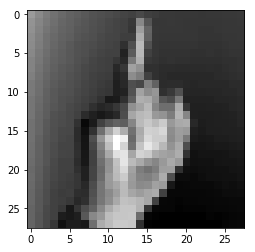

In [12]:
plt.imshow(sign, cmap=plt.cm.binary)
plt.show()

## Data preprocessing

Scale pixel values to be between 0 and 1

In [13]:
X_train /= 255
X_test /= 255

one hot encode the labels

In [14]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [15]:
y_train.shape, y_test.shape

((27455, 25), (7172, 25))

**create validation set**

In [16]:
num_val = int(0.2*len(X_train))
num_val

5491

In [17]:
X_val, y_val = X_train[:num_val], y_train[:num_val]
new_X_train, new_y_train = X_train[num_val:], y_train[num_val:]

## Building the model

In [51]:
model = Sequential([
    layers.Dense(64, activation='relu', 
                 input_shape=(X_train[0].shape[0],),
                 kernel_regularizer=regularizers.l2(0.001)),
    layers.Dropout(0.2),
    layers.Dense(64, activation='relu',
                 kernel_regularizer=regularizers.l2(0.001)),
    layers.Dropout(0.2),
    layers.Dense(64, activation='relu',
                 kernel_regularizer=regularizers.l2(0.001)),
    layers.Dropout(0.2),
    layers.Dense(y_train.shape[1], activation='softmax')
])

In [52]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['acc'])

In [53]:
history = model.fit(new_X_train, new_y_train, 
                    batch_size=64, epochs=40,
                    validation_data=(X_val, y_val))

Train on 21964 samples, validate on 5491 samples
Epoch 1/40
21964/21964 [==============================] - 1s 58us/step - loss: 3.0686 - acc: 0.1064 - val_loss: 2.4367 - val_acc: 0.2546
Epoch 2/40
21964/21964 [==============================] - 1s 41us/step - loss: 2.4439 - acc: 0.2186 - val_loss: 2.1768 - val_acc: 0.3169
Epoch 3/40
21964/21964 [==============================] - 1s 42us/step - loss: 2.1819 - acc: 0.2824 - val_loss: 1.9750 - val_acc: 0.3582
Epoch 4/40
21964/21964 [==============================] - 1s 42us/step - loss: 2.0274 - acc: 0.3356 - val_loss: 1.8688 - val_acc: 0.4034
Epoch 5/40
21964/21964 [==============================] - 1s 42us/step - loss: 1.9006 - acc: 0.3744 - val_loss: 1.8290 - val_acc: 0.4070
Epoch 6/40
21964/21964 [==============================] - 1s 42us/step - loss: 1.8052 - acc: 0.4055 - val_loss: 1.9650 - val_acc: 0.3763
Epoch 7/40
21964/21964 [==============================] - 1s 45us/step - loss: 1.7344 - acc: 0.4297 - val_loss: 1.7587 - val_acc:

## Loss and accuracy curves

In [54]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

In [55]:
training_loss = history_dict['loss']
validation_loss = history_dict['val_loss']

training_acc = history_dict['acc']
validation_acc = history_dict['val_acc']

epochs = range(1, len(training_acc)+1)

### Training and validation loss

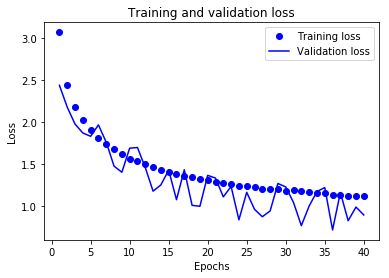

In [56]:
plt.plot(epochs, training_loss, 'bo', label='Training loss')
plt.plot(epochs, validation_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Training and validation accuracy

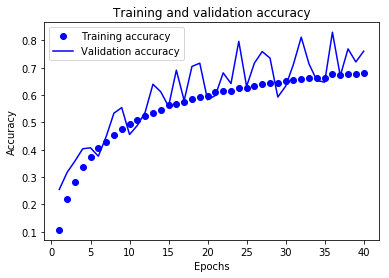

In [57]:
plt.clf()
plt.plot(epochs, training_acc, 'bo', label='Training accuracy')
plt.plot(epochs, validation_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Evaluate model on test set

In [58]:
test_loss, test_acc = model.evaluate(X_test, y_test)

7172/7172 [==============================] - 0s 22us/step


In [59]:
test_acc

0.5877021751254881